<a href="https://colab.research.google.com/github/hwijin-ham/-Section-1-Project-/blob/main/N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [118]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [119]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [120]:
df = df.drop(['Unnamed: 0', 'url'], axis=1)

In [121]:
df = df.drop_duplicates()

In [122]:
df

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
5,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
6,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
1288,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
1294,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [123]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [132]:
# 토큰화를 위한 파이프라인을 구성합니다.

tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    doc_tokens = list(filter(None, doc_tokens))
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [133]:
df['tokens']

0       [job, details, description, essential, duties,...
2       [as, a, team, member, in, the, finance, and, i...
4       [overview, american, credit, acceptance, seeks...
5       [jp, morgans, corporate, investment, bank, cib...
6       [at, vystar, we, offer, competitive, pay, an, ...
                              ...                        
1288    [our, expert, delivery, business, intelligence...
1294    [music, for, everyone, no, credit, card, neede...
1295    [senior, data, applied, scientist, do, you, ha...
1297    [ebay, is, a, global, commerce, leader, that, ...
1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, Length: 757, dtype: object

In [139]:
df['tokens'].tail(1)

1299    [tldr, spring, is, accelerating, the, discover...
Name: tokens, dtype: object

tldr

### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [143]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [146]:
# word_count 함수를 사용하여 단어의 분포를 나타내어 봅시다.
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
154,and,755,21864,1.0,0.056456,0.056456,0.997358
173,to,754,12694,2.0,0.032778,0.089233,0.996037
108,the,745,10538,3.0,0.027210,0.116444,0.984148
190,of,745,8839,4.0,0.022823,0.139267,0.984148
156,data,740,7425,5.0,0.019172,0.158440,0.977543
115,in,748,6769,6.0,0.017478,0.175918,0.988111
70,a,739,6436,7.0,0.016619,0.192537,0.976222
76,with,742,5727,8.0,0.014788,0.207324,0.980185
557,for,727,4132,9.0,0.010669,0.217994,0.960370
54,or,708,3812,10.0,0.009843,0.227837,0.935271


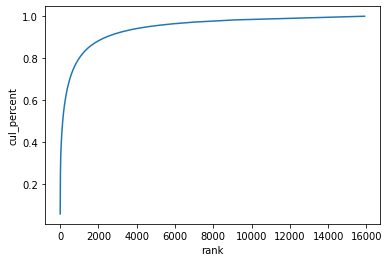

In [147]:
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [152]:
wc['word'].head(10).values

array(['and', 'to', 'the', 'of', 'data', 'in', 'a', 'with', 'for', 'or'],
      dtype=object)

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [153]:
# 기본 불용어 사전에 두 단어("data", "work")를 추가하는 코드를 사용해주세요.
STOP_WORDS = nlp.Defaults.stop_words.union(['data','work'])

In [168]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    
   
    for token in doc:
       
        if token.text.lower() not in STOP_WORDS:
            
            doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))
            

    doc_tokens = list(filter(None, doc_tokens))
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [169]:
wc = word_count(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
132,experience,705,3450,1.0,0.014197,0.014197,0.931308
300,business,536,2064,2.0,0.008494,0.022691,0.708058
129,science,611,1648,3.0,0.006782,0.029473,0.807133
173,team,588,1625,4.0,0.006687,0.036160,0.776750
464,learning,526,1596,5.0,0.006568,0.042728,0.694848
180,analysis,516,1349,6.0,0.005551,0.048279,0.681638
64,skills,547,1251,7.0,0.005148,0.053427,0.722589
352,machine,470,1152,8.0,0.004741,0.058168,0.620872
315,analytics,428,1136,9.0,0.004675,0.062843,0.565390
82,models,459,1034,10.0,0.004255,0.067098,0.606341


In [170]:
wc['word'].head(10).values

array(['experience', 'business', 'science', 'team', 'learning',
       'analysis', 'skills', 'machine', 'analytics', 'models'],
      dtype=object)

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [ ]:
tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []
    
   
    for token in doc:
       
        if token.text.lower() not in STOP_WORDS:
            
            doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))
            

    doc_tokens = list(filter(None, doc_tokens))
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [183]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) and (token.pos_ != 'PRON'):
            lemmas = list(filter(None, lemmas))
            lemmas.append(re.sub(r"[^a-z0-9]", "", token.lemma_))
    
    return lemmas

In [184]:
df['lemmas'] = df['description'].apply(get_lemmas)
df['lemmas'].head()

0    [ob, etails, escription, ssential, uties, resp...
2    [team, member, inance, nternal, udit, departme...
4    [overview, merican, redit, cceptance, seek, hi...
5    [organ, orporate, nvestment, ank, global, lead...
6    [ytar, offer, competitive, pay, excellent, ben...
Name: lemmas, dtype: object

In [185]:
wc = word_count(df['lemmas'])
wc[wc['rank'] <= 10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
132,experience,710,3602,1.0,0.015099,0.015099,0.937913
500,team,630,2241,2.0,0.009394,0.024493,0.832232
291,business,528,2031,3.0,0.008514,0.033006,0.697490
178,analysis,536,1545,4.0,0.006476,0.039482,0.708058
50,model,518,1400,5.0,0.005868,0.045351,0.684280
443,learning,475,1284,6.0,0.005382,0.050733,0.627477
136,product,439,1194,7.0,0.005005,0.055738,0.579921
49,skill,535,1180,8.0,0.004946,0.060684,0.706737
155,include,509,1177,9.0,0.004934,0.065618,0.672391
389,analytic,421,1145,10.0,0.004800,0.070418,0.556143


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [ ]:
df['senior'] = df['title'].apply()

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 